# Задание
Основные цели этого задания:

    - Попрактиковаться в борьбе с дисбалансом классов

    - Научиться заполнять пропуски в данных

    - Научиться использовать категориальные признаки.

Задача: по различным признакам, связанным с заявкой на грант, предсказать, будет ли заявка принята.

План решения:

1. Загрузите данные из csv файла. Ознакомьтесь с ними, проверьте наличие пропусков, узнайте типы признаков.

2. Подготовьте данные к обучению моделей:

        a. Отделите целевую переменную Grant.Status и выясните, сбалансированы ли классы. Если классы не сбалансированы, используйте в работе хотя бы один из изученных методов борьбы с дисбалансом классов;

        b. Заполните пропуски

          1. в количественных признаках заполните пропуски средними значениями и нулями (у каждой фичи будет по два варианта),

          2. в категориальных признаках выведите значения, которые они принимают, и найдите признак, где пропуски можно заполнить осмысленным значением. В остальных признаках заполните пропуски значением по умолчанию;

        c. Преобразуйте категориальные признаки в количественные с помощью прямого кодирования;

        d. Разделите данные на обучающую и тестовую части;

        e. Используйте масштабирование для получения признаков одинакового масштаба.

3. Обучите модели и выберите лучшую:

        a. Обучите модель логистической регрессии, используя кросс-валидацию. Оцените ее качество с помощью метрики rocauc. Выведите топ-10 признаков по важности, согласно обученной модели;

        b. Обучите модель случайного леса

          1. Для подбора гиперпараметров и кросс-валидации используйте структуру GridSearchCV,

          2. Выберите наилучший вариант случайного леса и выведите его параметры,

          3. Оцените качество выбранной модели с помощью метрики rocauc,

          4. Выведите топ-10 признаков по важности. Используйте атрибут feature_importances_, чтобы узнать важность признаков в деревянных моделях.

4. Напишите вывод, в котором будет содержаться информация о том, какие признаки важны согласно обеим моделям, и какая модель оказалась наилучшей для решения поставленной задачи.

In [1]:
# Импорт нужных библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder

# 1. Загрузите данные из csv файла. Ознакомьтесь с ними, проверьте наличие пропусков, узнайте типы признаков.

In [2]:
df = pd.read_csv('grant_data_imb.csv')

In [3]:
df.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,0,97A,30B,A,321024.0,50.0,321013.0,30.0,291502.0,20.0,...,2563.0,25.0,Yes,>10 to 15,2.0,6.0,3.0,5.0,15.0,3.0
1,0,36D,10A,G,300201.0,100.0,0.0,0.0,0.0,0.0,...,1038.0,1.0,NaN,Less than 0,0.0,3.0,0.0,4.0,0.0,0.0
2,0,317A,30D,NaN,321013.0,100.0,0.0,0.0,0.0,0.0,...,2763.0,25.0,Yes,>5 to 10,4.0,3.0,6.0,25.0,14.0,14.0
3,0,62B,10B,B,321103.0,30.0,321105.0,40.0,321204.0,30.0,...,2848.0,25.0,NaN,Less than 0,1.0,2.0,1.0,0.0,0.0,0.0
4,0,1A,10A,NaN,270603.0,60.0,321205.0,30.0,320603.0,10.0,...,2678.0,25.0,Yes,>5 to 10,5.0,14.0,0.0,9.0,7.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Grant.Status                            4113 non-null   int64  
 1   Sponsor.Code                            3856 non-null   object 
 2   Grant.Category.Code                     3856 non-null   object 
 3   Contract.Value.Band...see.note.A        1953 non-null   object 
 4   RFCD.Code.1                             3853 non-null   float64
 5   RFCD.Percentage.1                       3853 non-null   float64
 6   RFCD.Code.2                             3853 non-null   float64
 7   RFCD.Percentage.2                       3853 non-null   float64
 8   RFCD.Code.3                             3853 non-null   float64
 9   RFCD.Percentage.3                       3853 non-null   float64
 10  RFCD.Code.4                             3853 non-null   floa

In [5]:
df.isna().sum()

Grant.Status                                 0
Sponsor.Code                               257
Grant.Category.Code                        257
Contract.Value.Band...see.note.A          2160
RFCD.Code.1                                260
RFCD.Percentage.1                          260
RFCD.Code.2                                260
RFCD.Percentage.2                          260
RFCD.Code.3                                260
RFCD.Percentage.3                          260
RFCD.Code.4                                260
RFCD.Percentage.4                          260
RFCD.Code.5                                260
RFCD.Percentage.5                          260
SEO.Code.1                                 276
SEO.Percentage.1                           276
SEO.Code.2                                 276
SEO.Percentage.2                           276
SEO.Code.3                                 276
SEO.Percentage.3                           276
SEO.Code.4                                 276
SEO.Percentag

Вывод: имеются пропуски... Ничего, разберемя, продолжаем. Данные в основном количественные(float64 и int64),
    но и есть некоторые категориальные(object)

# 2. Подготовьте данные к обучению моделей:
    a. Отделите целевую переменную Grant.Status и выясните, сбалансированы ли классы. Если классы не сбалансированы, используйте в работе хотя бы один из изученных методов борьбы с дисбалансом классов;

    b. Заполните пропуски

      1. в количественных признаках заполните пропуски средними значениями и нулями (у каждой фичи будет по два варианта),

      2. в категориальных признаках выведите значения, которые они принимают, и найдите признак, где пропуски можно заполнить осмысленным значением. В остальных признаках заполните пропуски значением по умолчанию;

    c. Преобразуйте категориальные признаки в количественные с помощью прямого кодирования;

    d. Разделите данные на обучающую и тестовую части;

    e. Используйте масштабирование для получения признаков одинакового масштаба.

Формально: Приступим к EDA

In [6]:
df.columns = df.columns.str.lower() # переведем названия в нижний регистр
df.columns = df.columns.str.replace('.', '_', regex=True) # заменим в названиях точки на подчеркивания

array([[<Axes: title={'center': 'grant_status'}>,
        <Axes: title={'center': 'rfcd_code_1'}>,
        <Axes: title={'center': 'rfcd_percentage_1'}>,
        <Axes: title={'center': 'rfcd_code_2'}>,
        <Axes: title={'center': 'rfcd_percentage_2'}>,
        <Axes: title={'center': 'rfcd_code_3'}>],
       [<Axes: title={'center': 'rfcd_percentage_3'}>,
        <Axes: title={'center': 'rfcd_code_4'}>,
        <Axes: title={'center': 'rfcd_percentage_4'}>,
        <Axes: title={'center': 'rfcd_code_5'}>,
        <Axes: title={'center': 'rfcd_percentage_5'}>,
        <Axes: title={'center': 'seo_code_1'}>],
       [<Axes: title={'center': 'seo_percentage_1'}>,
        <Axes: title={'center': 'seo_code_2'}>,
        <Axes: title={'center': 'seo_percentage_2'}>,
        <Axes: title={'center': 'seo_code_3'}>,
        <Axes: title={'center': 'seo_percentage_3'}>,
        <Axes: title={'center': 'seo_code_4'}>],
       [<Axes: title={'center': 'seo_percentage_4'}>,
        <Axes: titl

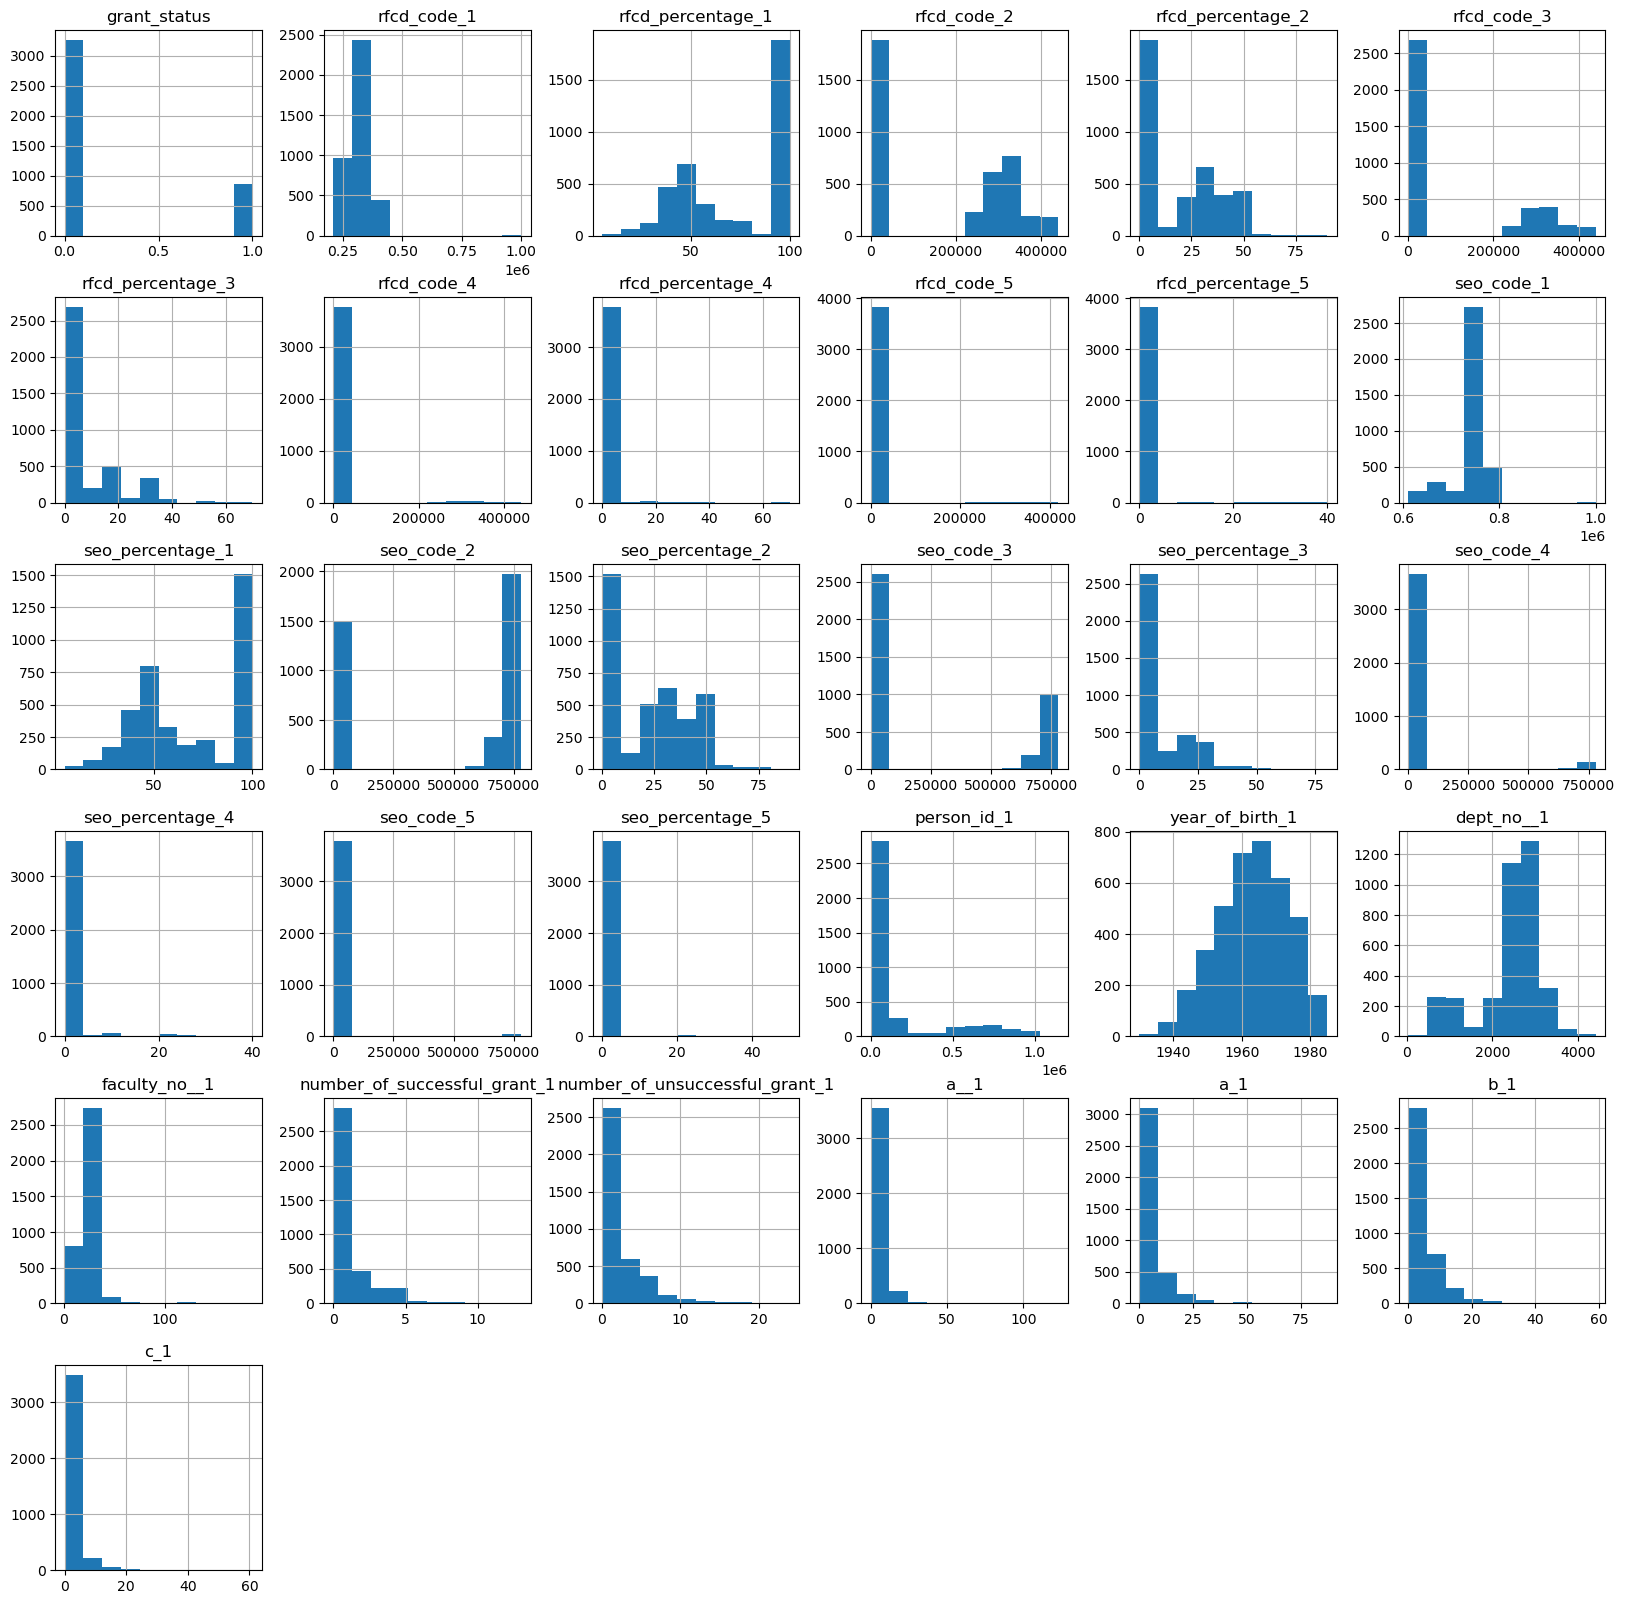

In [7]:
df.hist(figsize=(20, 20))

Ни где нет нормального распределения

In [8]:
df.describe()

,grant_status,rfcd_code_1,rfcd_percentage_1,rfcd_code_2,rfcd_percentage_2,rfcd_code_3,rfcd_percentage_3,rfcd_code_4,rfcd_percentage_4,rfcd_code_5,...,person_id_1,year_of_birth_1,dept_no__1,faculty_no__1,number_of_successful_grant_1,number_of_unsuccessful_grant_1,a__1,a_1,b_1,c_1
count,4113.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,...,3.826000e+03,3825.000000,3665.000000,3664.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000
mean,0.207634,314904.682845,74.696860,161386.717104,17.642616,96437.197508,7.089541,6835.177005,0.442512,1767.989878,...,1.717884e+05,1962.684967,2440.684857,23.830786,1.050183,2.427339,3.594877,5.230528,4.118400,2.232619
std,0.405663,47163.318702,26.875419,161577.090361,19.259007,148599.260202,11.937533,45889.060627,3.228834,23598.311088,...,2.542264e+05,9.421352,740.105499,11.346395,1.482831,2.976874,7.155090,7.758928,5.385708,4.349171
min,0.000000,210000.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.620000e+02,1930.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,280401.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.773075e+04,1955.000000,2298.000000,25.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,320801.000000,80.000000,240202.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.123450e+04,1965.000000,2653.000000,25.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000
75%,0.000000,321202.000000,100.000000,320702.000000,30.000000,270208.000000,15.000000,0.000000,0.000000,0.000000,...,1.208682e+05,1970.000000,2813.000000,25.000000,2.000000,3.000000,4.000000,7.000000,6.000000,3.000000
max,1.000000,999999.000000,100.000000,440207.000000,90.000000,440207.000000,70.000000,440105.000000,70.000000,419999.000000,...,1.145967e+06,1985.000000,4418.000000,187.000000,13.000000,24.000000,123.000000,87.000000,59.000000,61.000000


In [9]:
print(len(df)- len(df.drop_duplicates()))
df.drop_duplicates(inplace=True)
df.reset_index(drop=True)

65


,grant_status,sponsor_code,grant_category_code,contract_value_band___see_note_a,rfcd_code_1,rfcd_percentage_1,rfcd_code_2,rfcd_percentage_2,rfcd_code_3,rfcd_percentage_3,...,dept_no__1,faculty_no__1,with_phd_1,no__of_years_in_uni_at_time_of_grant_1,number_of_successful_grant_1,number_of_unsuccessful_grant_1,a__1,a_1,b_1,c_1
0,0,97A,30B,A,321024.0,50.0,321013.0,30.0,291502.0,20.0,...,2563.0,25.0,Yes,>10 to 15,2.0,6.0,3.0,5.0,15.0,3.0
1,0,36D,10A,G,300201.0,100.0,0.0,0.0,0.0,0.0,...,1038.0,1.0,NaN,Less than 0,0.0,3.0,0.0,4.0,0.0,0.0
2,0,317A,30D,NaN,321013.0,100.0,0.0,0.0,0.0,0.0,...,2763.0,25.0,Yes,>5 to 10,4.0,3.0,6.0,25.0,14.0,14.0
3,0,62B,10B,B,321103.0,30.0,321105.0,40.0,321204.0,30.0,...,2848.0,25.0,NaN,Less than 0,1.0,2.0,1.0,0.0,0.0,0.0
4,0,1A,10A,NaN,270603.0,60.0,321205.0,30.0,320603.0,10.0,...,2678.0,25.0,Yes,>5 to 10,5.0,14.0,0.0,9.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,0,103C,30B,NaN,321022.0,100.0,0.0,0.0,0.0,0.0,...,2773.0,25.0,NaN,>=0 to 5,0.0,1.0,0.0,0.0,0.0,0.0
4044,0,2B,10A,NaN,340208.0,50.0,340499.0,50.0,0.0,0.0,...,1678.0,13.0,Yes,more than 15,0.0,1.0,1.0,5.0,8.0,0.0
4045,1,2B,10A,NaN,320702.0,40.0,270102.0,30.0,320305.0,30.0,...,2653.0,25.0,NaN,>=0 to 5,1.0,0.0,26.0,15.0,9.0,6.0
4046,0,40D,10B,C,NaN,NaN,NaN,NaN,NaN,NaN,...,3248.0,31.0,NaN,>=0 to 5,0.0,1.0,1.0,0.0,0.0,0.0


Было 65 дубликатов

In [10]:
df.head()

,grant_status,sponsor_code,grant_category_code,contract_value_band___see_note_a,rfcd_code_1,rfcd_percentage_1,rfcd_code_2,rfcd_percentage_2,rfcd_code_3,rfcd_percentage_3,...,dept_no__1,faculty_no__1,with_phd_1,no__of_years_in_uni_at_time_of_grant_1,number_of_successful_grant_1,number_of_unsuccessful_grant_1,a__1,a_1,b_1,c_1
0,0,97A,30B,A,321024.0,50.0,321013.0,30.0,291502.0,20.0,...,2563.0,25.0,Yes,>10 to 15,2.0,6.0,3.0,5.0,15.0,3.0
1,0,36D,10A,G,300201.0,100.0,0.0,0.0,0.0,0.0,...,1038.0,1.0,NaN,Less than 0,0.0,3.0,0.0,4.0,0.0,0.0
2,0,317A,30D,NaN,321013.0,100.0,0.0,0.0,0.0,0.0,...,2763.0,25.0,Yes,>5 to 10,4.0,3.0,6.0,25.0,14.0,14.0
3,0,62B,10B,B,321103.0,30.0,321105.0,40.0,321204.0,30.0,...,2848.0,25.0,NaN,Less than 0,1.0,2.0,1.0,0.0,0.0,0.0
4,0,1A,10A,NaN,270603.0,60.0,321205.0,30.0,320603.0,10.0,...,2678.0,25.0,Yes,>5 to 10,5.0,14.0,0.0,9.0,7.0,0.0


In [11]:
df.isna().sum()

grant_status                                 0
sponsor_code                               245
grant_category_code                        245
contract_value_band___see_note_a          2117
rfcd_code_1                                249
rfcd_percentage_1                          249
rfcd_code_2                                249
rfcd_percentage_2                          249
rfcd_code_3                                249
rfcd_percentage_3                          249
rfcd_code_4                                249
rfcd_percentage_4                          249
rfcd_code_5                                249
rfcd_percentage_5                          249
seo_code_1                                 264
seo_percentage_1                           264
seo_code_2                                 264
seo_percentage_2                           264
seo_code_3                                 264
seo_percentage_3                           264
seo_code_4                                 264
seo_percentag

<div class="alert alert-info">
    
    
    
        a. Отделите целевую переменную Grant.Status и выясните, сбалансированы ли классы. Если классы не сбалансированы, используйте в работе хотя бы один из изученных методов борьбы с дисбалансом классов;

        b. Заполните пропуски

          1. в количественных признаках заполните пропуски средними значениями и нулями (у каждой фичи будет по два варианта),

          2. в категориальных признаках выведите значения, которые они принимают, и найдите признак, где пропуски можно заполнить осмысленным значением. В остальных признаках заполните пропуски значением по умолчанию;

        c. Преобразуйте категориальные признаки в количественные с помощью прямого кодирования;

        d. Разделите данные на обучающую и тестовую части;

        e. Используйте масштабирование для получения признаков одинакового масштаба.

a. Отделите целевую переменную Grant.Status и выясните, сбалансированы ли классы. Если классы не сбалансированы, используйте в работе хотя бы один из изученных методов борьбы с дисбалансом классов;

In [12]:
# определение переменных-предикторов и переменной ответа
X = df.drop(['grant_status'], axis=1)
y = df['grant_status']

In [13]:
y.value_counts()

0    3209
1     839
Name: grant_status, dtype: int64

Еще как не сбалансированнные, неправильных ответов почти в 4 раза больше правильных.
Но балансированием займемся после заполнения пропусков в данных

С числовыми признаками мы поступим слудующим образом

In [14]:
pd.set_option('display.max_columns', None) # все столбцы отобразить

In [15]:
X.describe()

,rfcd_code_1,rfcd_percentage_1,rfcd_code_2,rfcd_percentage_2,rfcd_code_3,rfcd_percentage_3,rfcd_code_4,rfcd_percentage_4,rfcd_code_5,rfcd_percentage_5,seo_code_1,seo_percentage_1,seo_code_2,seo_percentage_2,seo_code_3,seo_percentage_3,seo_code_4,seo_percentage_4,seo_code_5,seo_percentage_5,person_id_1,year_of_birth_1,dept_no__1,faculty_no__1,number_of_successful_grant_1,number_of_unsuccessful_grant_1,a__1,a_1,b_1,c_1
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3784.000000,3784.000000,3784.000000,3784.000000,3784.000000,3784.000000,3784.000000,3784.000000,3784.000000,3784.000000,3.784000e+03,3783.000000,3624.000000,3623.000000,3784.000000,3784.000000,3784.000000,3784.000000,3784.000000,3784.000000
mean,314987.705186,74.569097,162425.832061,17.726770,97265.227428,7.131614,6847.968939,0.442222,1793.120558,0.130297,729038.464059,70.372172,445947.510571,21.339403,235716.176797,7.344715,32627.954281,0.724101,9544.161205,0.219345,1.719929e+05,1962.694951,2437.535044,23.789401,1.048890,2.420455,3.555497,5.219345,4.101480,2.234672
std,47395.004340,26.855677,161657.262975,19.229527,149011.083605,11.938607,45925.908243,3.226775,23764.531159,1.850843,34714.514632,26.842408,356124.218765,20.053322,341509.658083,12.048906,150119.297718,3.734726,82561.101575,2.227359,2.544404e+05,9.431206,741.594166,11.358331,1.483717,2.976161,6.999950,7.728610,5.369927,4.364675
min,210000.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,610102.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.620000e+02,1930.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280401.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,730104.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.763200e+04,1955.000000,2298.000000,25.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,320801.000000,80.000000,240204.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,730110.500000,70.000000,730101.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.108200e+04,1965.000000,2653.000000,25.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000
75%,321202.000000,100.000000,320704.000000,30.000000,270304.000000,20.000000,0.000000,0.000000,0.000000,0.000000,740301.000000,100.000000,730211.000000,40.000000,730102.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.222645e+05,1970.000000,2813.000000,25.000000,2.000000,3.000000,4.000000,7.000000,6.000000,3.000000
max,999999.000000,100.000000,440207.000000,90.000000,440207.000000,70.000000,440105.000000,70.000000,419999.000000,40.000000,999999.000000,100.000000,780199.000000,90.000000,780199.000000,80.000000,780108.000000,40.000000,780105.000000,50.000000,1.145967e+06,1985.000000,4418.000000,187.000000,13.000000,24.000000,123.000000,87.000000,59.000000,61.000000


b. Заполните пропуски

Смотрим на значение среднего(mean) и стандартное отклонение(std):
>Если отклонение слишком близкое к среднему, то пропуски будет заполнять медианой(median), в противном случае средним значением.

In [16]:
# Среднее
X[['rfcd_code_1', 
   'rfcd_percentage_1', 
   'seo_code_1', 
   'seo_percentage_1', 
   'year_of_birth_1', 
   'dept_no__1', 
   'faculty_no__1']] =\
X[['rfcd_code_1', 'rfcd_percentage_1', 'seo_code_1', 
   'seo_percentage_1', 'year_of_birth_1', 'dept_no__1', 
   'faculty_no__1']].fillna(X[['rfcd_code_1', 'rfcd_percentage_1', 'seo_code_1', 
                               'seo_percentage_1', 'year_of_birth_1', 'dept_no__1', 'faculty_no__1']].mean())


In [17]:
# Медиана
X[['rfcd_code_2', 
   'rfcd_percentage_2', 
   'rfcd_code_3', 
   'rfcd_percentage_3', 
   'rfcd_code_4', 
   'rfcd_percentage_4', 
   'rfcd_code_5', 
   'rfcd_percentage_5', 
   'seo_code_2', 
   'seo_percentage_2', 
   'seo_code_3', 
   'seo_percentage_3', 
   'seo_code_4', 
   'seo_percentage_4', 
   'seo_code_5', 
   'seo_percentage_5', 
   'person_id_1', 
   'number_of_successful_grant_1', 
   'number_of_unsuccessful_grant_1', 
   'a__1', 
   'a_1', 
   'b_1', 
   'c_1']] =\
X[['rfcd_code_2', 'rfcd_percentage_2', 'rfcd_code_3', 'rfcd_percentage_3', 
   'rfcd_code_4', 'rfcd_percentage_4', 'rfcd_code_5', 'rfcd_percentage_5', 
   'seo_code_2', 'seo_percentage_2', 'seo_code_3', 'seo_percentage_3', 
   'seo_code_4', 'seo_percentage_4', 'seo_code_5', 'seo_percentage_5', 
   'person_id_1', 'number_of_successful_grant_1', 'number_of_unsuccessful_grant_1', 
   'a__1', 'a_1', 'b_1', 'c_1']].fillna(X[['rfcd_code_2', 'rfcd_percentage_2', 'rfcd_code_3', 'rfcd_percentage_3', 'rfcd_code_4', 'rfcd_percentage_4', 'rfcd_code_5', 'rfcd_percentage_5', 'seo_code_2', 'seo_percentage_2', 'seo_code_3', 'seo_percentage_3', 
                                           'seo_code_4', 'seo_percentage_4', 'seo_code_5', 'seo_percentage_5', 'person_id_1', 'number_of_successful_grant_1', 'number_of_unsuccessful_grant_1', 'a__1', 'a_1', 'b_1', 'c_1']].median())


А категорильаные заполим по умочанию: мы их не знаем, вот и скажем, что они unknown, то есть неизвестны

In [18]:
categorial_X = X.select_dtypes(include='object').columns
X[categorial_X] = X[categorial_X].fillna('unknown')

In [19]:
X.isna().sum()

sponsor_code                              0
grant_category_code                       0
contract_value_band___see_note_a          0
rfcd_code_1                               0
rfcd_percentage_1                         0
rfcd_code_2                               0
rfcd_percentage_2                         0
rfcd_code_3                               0
rfcd_percentage_3                         0
rfcd_code_4                               0
rfcd_percentage_4                         0
rfcd_code_5                               0
rfcd_percentage_5                         0
seo_code_1                                0
seo_percentage_1                          0
seo_code_2                                0
seo_percentage_2                          0
seo_code_3                                0
seo_percentage_3                          0
seo_code_4                                0
seo_percentage_4                          0
seo_code_5                                0
seo_percentage_5                

Вот, другое дело, можно и приcтупить к разделению выборок для обучения модели

c. Преобразуйте категориальные признаки в количественные с помощью прямого кодирования;

In [20]:
# удалим те признаки, которые никакой роли не играют, а перевод их количественные ни к чему хорошему не приведет
X.drop(['sponsor_code', 'grant_category_code'], axis= 1 , inplace=True)

In [21]:
X = pd.get_dummies(X[['contract_value_band___see_note_a']], drop_first=True)

In [22]:
X

,contract_value_band___see_note_a_B,contract_value_band___see_note_a_C,contract_value_band___see_note_a_D,contract_value_band___see_note_a_E,contract_value_band___see_note_a_F,contract_value_band___see_note_a_G,contract_value_band___see_note_a_H,contract_value_band___see_note_a_I,contract_value_band___see_note_a_J,contract_value_band___see_note_a_K,contract_value_band___see_note_a_L,contract_value_band___see_note_a_M,contract_value_band___see_note_a_O,contract_value_band___see_note_a_P,contract_value_band___see_note_a_Q,contract_value_band___see_note_a_unknown
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4111,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


d. Разделите данные на обучающую и тестовую части;

In [23]:
# разделение набора данных на обучающий и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

e. Используйте масштабирование для получения признаков одинакового масштаба.

In [24]:
# выполним маштабирование для количсетвенных признаков
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# 3. Обучите модели и выберите лучшую:


<div class="alert alert-info">

        a. Обучите модель логистической регрессии, используя кросс-валидацию. Оцените ее качество с помощью метрики rocauc. Выведите топ-10 признаков по важности, согласно обученной модели;

        b. Обучите модель случайного леса

          1. Для подбора гиперпараметров и кросс-валидации используйте структуру GridSearchCV,

          2. Выберите наилучший вариант случайного леса и выведите его параметры,

          3. Оцените качество выбранной модели с помощью метрики rocauc,

          4. Выведите топ-10 признаков по важности. Используйте атрибут feature_importances_, чтобы узнать важность признаков в деревянных моделях.

> Пункт a. Обучите модель логистической регрессии, используя кросс-валидацию. Оцените ее качество с помощью метрики rocauc. Выведите топ-10 признаков по важности, согласно обученной модели;

In [25]:
# Создаем модель логистической регрессии
model = LogisticRegressionCV(solver='liblinear', random_state=12, class_weight='balanced', cv=10)

In [26]:
# Выполняем кросс-валидацию и оцениваем качество с помощью метрики ROC-AUC
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

In [27]:
# Выводим среднее значение ROC-AUC
mean_auc = np.mean(scores)
print('Среднее значение AUC-ROC:', mean_auc)

Среднее значение AUC-ROC: 0.758873924484813


In [28]:
# Обучаем модель на обучеющей выборке
model.fit(X_train_sc, y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=12,
                     solver='liblinear')

In [29]:
# Получаем коэффициенты модели
coefs = model.coef_[0]

In [30]:
# Находим топ-10 признаков
top_features = np.argsort(abs(coefs))[-10:]

In [31]:
# Выводим топ-10 признаков и их коэффициенты
for feature in top_features:
    print(f'Признак: {feature}, Коэффициент: {coefs[feature]}')

Признак: 10, Коэффициент: 0.005627797418603635
Признак: 9, Коэффициент: 0.005627797418603682
Признак: 14, Коэффициент: 0.005627797418603699
Признак: 8, Коэффициент: -0.00622064629428783
Признак: 1, Коэффициент: 0.009110609565644884
Признак: 4, Коэффициент: 0.015652994649054935
Признак: 3, Коэффициент: 0.017174591444308114
Признак: 5, Коэффициент: 0.020657770060031666
Признак: 2, Коэффициент: 0.0218534475478631
Признак: 15, Коэффициент: -0.06150731209976642


In [32]:
# Вариант из шпаргалки
roc_auc_score(y_test, model.predict_proba(X_test_sc)[:, 1])

0.7736867748368383

In [33]:
pd.DataFrame(zip(list(X.columns), list(abs(model.coef_[0]))), 
             columns=['feature', 'importance']).sort_values(by=['importance'], ascending=False)

,feature,importance
15,contract_value_band___see_note_a_unknown,0.061507
2,contract_value_band___see_note_a_D,0.021853
5,contract_value_band___see_note_a_G,0.020658
3,contract_value_band___see_note_a_E,0.017175
4,contract_value_band___see_note_a_F,0.015653
1,contract_value_band___see_note_a_C,0.009111
8,contract_value_band___see_note_a_J,0.006221
14,contract_value_band___see_note_a_Q,0.005628
9,contract_value_band___see_note_a_K,0.005628
10,contract_value_band___see_note_a_L,0.005628


# Не вывод а вопрос, как можно было вывести не номера признаков, а их названия? Потому что второй варинат был взят из шпаргалки)

> b. Обучите модель случайного леса

        - 1. Для подбора гиперпараметров и кросс-валидации используйте структуру GridSearchCV,

        - 2. Выберите наилучший вариант случайного леса и выведите его параметры,

        - 3. Оцените качество выбранной модели с помощью метрики rocauc,

        - 4. Выведите топ-10 признаков по важности. Используйте атрибут feature_importances_, чтобы узнать важность признаков в деревянных моделях.

In [34]:
# Создайте модель случайного леса:
model = RandomForestClassifier(class_weight='balanced')

In [35]:
# Определите набор значений для гиперпараметров, которые вы хотите перебрать:
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}

In [36]:
# Создайте объект GridSearchCV, указав модель, набор значений гиперпараметров и количество фолдов для кросс-валидации:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')

In [37]:
# Обучите модель на тренировочных данных:
grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [38]:
# Выведите наилучшие параметры модели:
grid_search.best_params_

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}

In [39]:
# Оцените качество наилучшей модели на валидационных данных с помощью метрики roc_auc:
best_model = grid_search.best_estimator_
y_pred = best_model.predict_proba(X_test_sc)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {auc}")

ROC AUC: 0.7803435460478608


In [40]:
# топ-10 признаков по их важности
pd.DataFrame(zip(list(X.columns), list(best_model.feature_importances_)), 
             columns=['feature', 'importance']).sort_values(by=['importance'], ascending=False)

,feature,importance
15,contract_value_band___see_note_a_unknown,0.810760
2,contract_value_band___see_note_a_D,0.041155
5,contract_value_band___see_note_a_G,0.032587
0,contract_value_band___see_note_a_B,0.026079
3,contract_value_band___see_note_a_E,0.020996
4,contract_value_band___see_note_a_F,0.019811
8,contract_value_band___see_note_a_J,0.019602
1,contract_value_band___see_note_a_C,0.011166
6,contract_value_band___see_note_a_H,0.004905
7,contract_value_band___see_note_a_I,0.003383


# 4. Напишите вывод, в котором будет содержаться информация о том, какие признаки важны согласно обеим моделям, и какая модель оказалась наилучшей для решения поставленной задачи.

Признаки совпали, самым важным парметр Contract.Value.Band.see.note, и самые лучшие результаты показал Случайный лес